#This Python script solves the problems outlined in LAB 4 Project 1:
#Author: Krithika Ramamurthy
#Date: Feb 24


In [ ]:
#imporing pytorch, neural network, optimization, read csv file and plot libraries
import torch
from torch import nn
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
#read train dataset
df_trainds = pd.read_csv('/content/train (1).csv')
df_trainds.head()

,Unnamed: 0,x,y
0,0,0.771270,2.474538
1,1,0.063558,1.192772
2,2,0.863103,2.912784
3,3,0.025419,1.078507
4,4,0.731994,2.473164


In [ ]:
#Converting dataset to Pytorch tensors
x_train = torch.tensor(df_trainds['x'].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(df_trainds['y'].values, dtype=torch.float32)

In [ ]:
#Loading test dataset
df_testds = pd.read_csv('/content/test.csv')
df_testds.head()

,Unnamed: 0,x,y
0,0,0.304614,1.615251
1,1,0.155995,1.347700
2,2,0.662522,2.234106
3,3,0.107891,1.298501
4,4,0.909320,2.893834


In [ ]:
#Converting dataset to tensors
x_test = torch.tensor(df_testds['x'].values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(df_testds['y'].values, dtype=torch.float32)

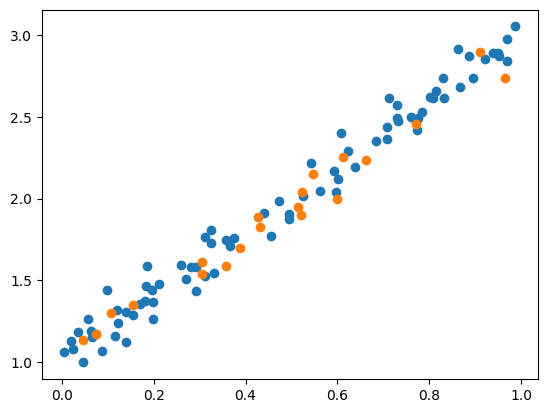

In [ ]:
#creating scatter Plot
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

In [ ]:
#Building the NN model with 1 input and 1 output featues
model = nn.Linear(1,1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
#define loss function
loss_fn = nn.MSELoss()

In [ ]:
#define optimization
model.parameters()

<generator object Module.parameters at 0x7c72fd4add20>

In [ ]:
for name, param in model.named_parameters():
  print(name, param)
#Setting Up Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

weight Parameter containing:
tensor([[-0.3134]], requires_grad=True)
bias Parameter containing:
tensor([-0.1195], requires_grad=True)


In [ ]:
#setting up the training loop
N = 500
#Maintaining loss values for Vizualization
loss_hist = []
for iter in range(N):
  yp = model(x_train)
  #calculating loss
  loss = loss_fn(yp.squeeze(), y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  loss_hist.append(loss.item())

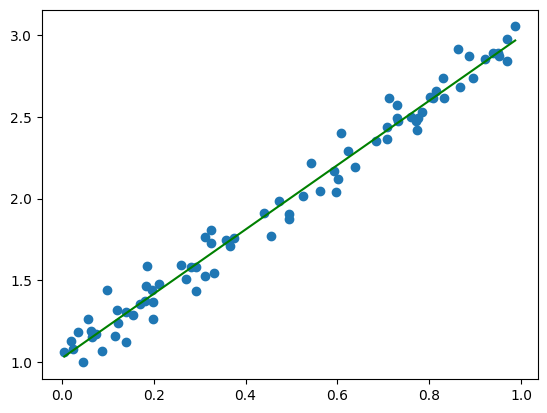

In [ ]:
#visualize
x_vis = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
#making predictions with the model
y_vis = model(x_vis)
#creating scatter plot
plt.scatter(x_train, y_train)
plt.plot(x_vis.detach(), y_vis.detach(), 'g')

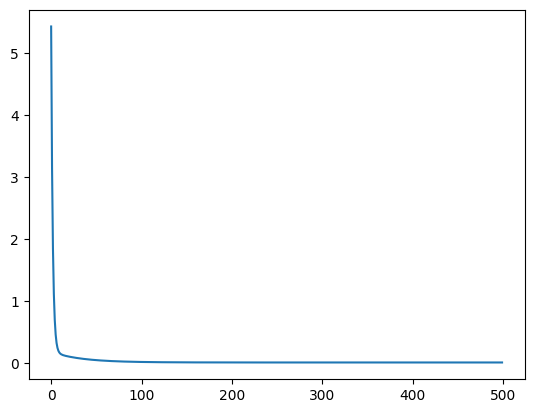

In [ ]:
#creating line plot
plt.plot(range(N), loss_hist)

In [ ]:
#testing model on test dataset
import torch.nn.functional as F
yp = model(x_test)

# Calculate the l1 los
l1_loss = F.l1_loss(yp.squeeze(), y_test)
print(l1_loss)

tensor(0.0736, grad_fn=<MeanBackward0>)


#Project 2:

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
#Downloading training dataset
train_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True
)

100%|██████████| 170498071/170498071 [00:03<00:00, 48936384.15it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
#Downloading test dataset
test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True
)

Files already downloaded and verified


Label:  2


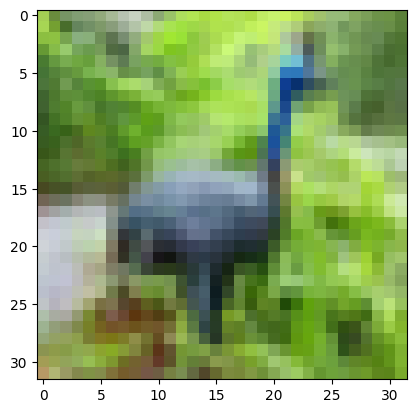

In [ ]:
#Checking one of the images from the train dataset
image, label = train_data[6]
plt.imshow(image)
print('Label: ', label)


In [ ]:
#Converting image to tensors
from torchvision.transforms import ToTensor
#transform train ds to tensors
train_data = torchvision.datasets.CIFAR10(
    root = './data',
    train = True,
    transform=ToTensor()
)
#transform test ds to tensors
test_data = torchvision.datasets.CIFAR10(
    root = './data',
    train = False,
    transform=ToTensor()
)

In [ ]:
#Batch size and DataLoader
batch_size = 64
#create dataloaders
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
#checking one batch of dataloader
for image, labels in train_dataloader:
    print(labels.shape)
    print(image.shape)
    break

torch.Size([64])
torch.Size([64, 3, 32, 32])


In [ ]:
classes = ("planes", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#visualizing one batch of images
def imshow(img):
    # Denormalize the images
    img = img / 2 + 0.5
    np_img = img.numpy()
    transposed = np.transpose(np_img, (1, 2, 0))
    plt.imshow(transposed)
    plt.show()

In [ ]:
print("Type of train_dataloader:", type(train_dataloader))
print("Value of train_dataloader:", train_dataloader)


Type of train_dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
Value of train_dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7bdf9d295f60>


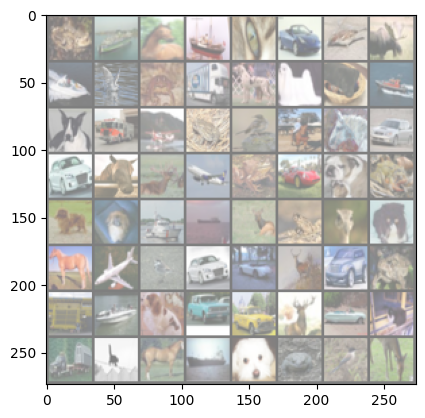

Labels: tensor([6, 8, 7, 8, 3, 1, 2, 4, 8, 2, 6, 9, 5, 5, 5, 8, 5, 9, 0, 6, 2, 7, 7, 1,
        1, 7, 4, 0, 6, 1, 5, 6, 5, 5, 8, 8, 4, 6, 2, 3, 7, 0, 2, 1, 1, 4, 1, 6,
        9, 8, 5, 1, 1, 4, 1, 3, 9, 3, 7, 8, 5, 6, 2, 4])


In [ ]:
iterator = iter(train_dataloader)

# Get a batch of images and labels
images, labels = next(iterator)

# Visualize the batch of images
imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)


In [ ]:
#Checking GPU to acheive faster training
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using the {device} device")

Using the cuda device


In [ ]:
#Building a CNN model
import torch.nn as nn
import torch.nn.functional as F

#define model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim
import torch.nn as nn
#referred this tutorial https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
#Training the CNN model
for epoch in range(20):
    running_loss = 0.0

    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch and data size
    print(f"Epoch: {epoch}, Number of images: {i}, Loss: {running_loss}")

print("Finished training!")

Epoch: 0, Number of images: 781, Loss: 1799.6845633983612
Epoch: 1, Number of images: 781, Loss: 1784.1157002449036
Epoch: 2, Number of images: 781, Loss: 1621.1893175840378
Epoch: 3, Number of images: 781, Loss: 1530.1930035352707
Epoch: 4, Number of images: 781, Loss: 1463.8455951213837
Epoch: 5, Number of images: 781, Loss: 1388.1380470991135
Epoch: 6, Number of images: 781, Loss: 1310.2970784902573
Epoch: 7, Number of images: 781, Loss: 1244.6222175359726
Epoch: 8, Number of images: 781, Loss: 1196.224776506424
Epoch: 9, Number of images: 781, Loss: 1159.1751427650452
Epoch: 10, Number of images: 781, Loss: 1130.667066693306
Epoch: 11, Number of images: 781, Loss: 1106.5116873979568
Epoch: 12, Number of images: 781, Loss: 1085.2330250740051
Epoch: 13, Number of images: 781, Loss: 1061.3817954063416
Epoch: 14, Number of images: 781, Loss: 1044.1838387846947
Epoch: 15, Number of images: 781, Loss: 1024.395255804062
Epoch: 16, Number of images: 781, Loss: 1005.9137545824051
Epoch: 17,

In [ ]:
#Accuracy of the model
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Network's accuracy is: {100 * correct // total}%")

Network's accuracy is: 55%


In [ ]:
#Saving the model
torch.save(net.state_dict(), "model.pth")
print("Saved pythorch model state to model.pth")

Saved pythorch model state to model.pth
